In [1]:
from anndata import AnnData
import scanpy as sc
import squidpy as sq
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
adata = sc.read_h5ad("/home/levinsj/spatial/adata/7_13_23_rawExport.h5ad")

In [3]:
adata.obs["Run_Tissue_name"].value_counts()

Run_Tissue_name
S0    730245
S1    332841
Name: count, dtype: int64

In [4]:
adata.obs["slide"] = (adata.obs["Run_Tissue_name"] == "S1").astype(int)

print(adata.obs["slide"].value_counts())

slide
0    730245
1    332841
Name: count, dtype: int64


# Subset to slide 0

In [5]:
adata = adata[adata.obs["Run_Tissue_name"] != "S1"]

# Calculate mean RNA counts per FOV

In [6]:
fov_mean = []
fov_id = []

for i in adata.obs["fov"].unique():
    fov_mean.append(np.mean(adata[adata.obs["fov"] == i].obs["nCount_RNA"]))
    fov_id.append(i)

fov_dict = {k: v for k, v in zip(fov_id, fov_mean)}

adata.obs["meanCounts_perFOV"] = adata.obs['fov'].map(fov_dict)

/tmp/ipykernel_41435/2670688503.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["meanCounts_perFOV"] = adata.obs['fov'].map(fov_dict)


# Plot QC metrics in spatial terms

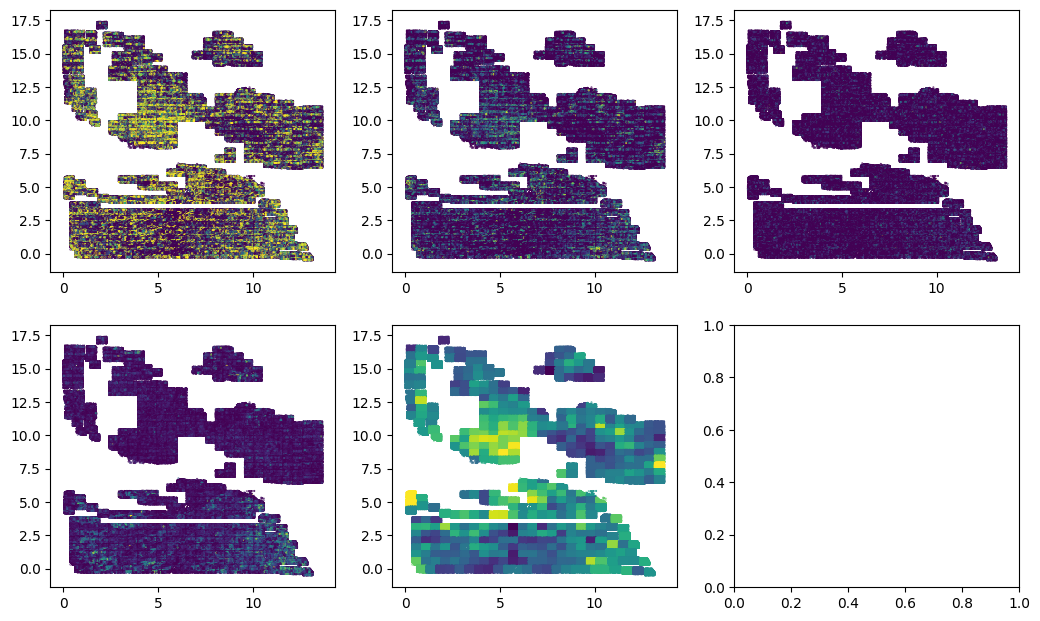

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12.5, 7.5))

axes[0,0].scatter(adata.obs["x_slide_mm"], adata.obs["y_slide_mm"], c=(adata.obs['nCount_RNA']),vmax = 200,vmin = 60, s = 0.1)
axes[0,1].scatter(adata.obs["x_slide_mm"], adata.obs["y_slide_mm"], c=(adata.obs['nFeature_RNA']),vmax = 200,vmin = 60, s = 0.1)
axes[0,2].scatter(adata.obs["x_slide_mm"], adata.obs["y_slide_mm"], c=(adata.obs['nCount_negprobes']),vmax = 5,vmin = 0, s = 0.1)
axes[1,0].scatter(adata.obs["x_slide_mm"], adata.obs["y_slide_mm"], c=(adata.obs['nCount_falsecode']),vmax = 40,vmin = 0, s = 0.1)
axes[1,1].scatter(adata.obs["x_slide_mm"], adata.obs["y_slide_mm"], c=(adata.obs['meanCounts_perFOV']),vmax = 200,vmin = 60, s = 0.1)

plt.show()

# Create histograms of QC metrics for the slide

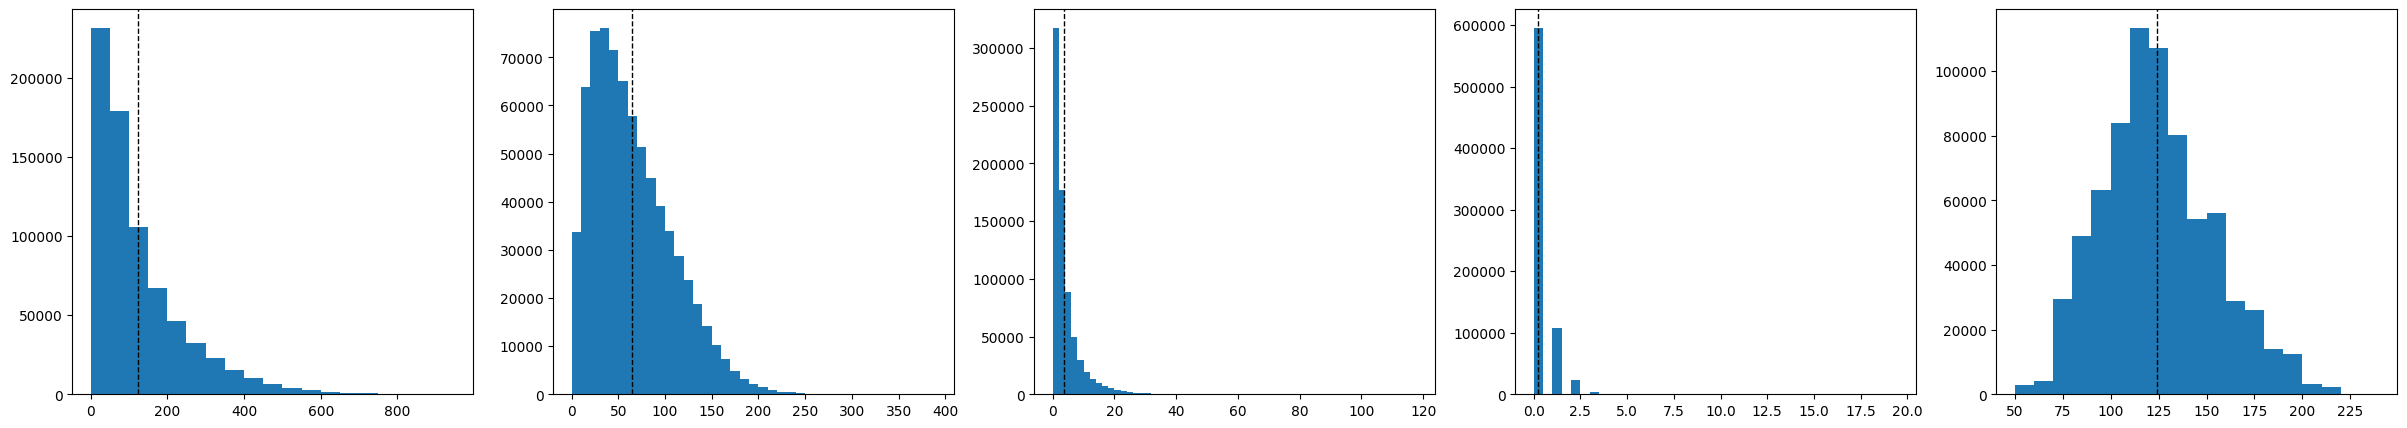

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))
axes[0].hist(adata.obs["nCount_RNA"], bins = np.arange(0, 1000, 50))
axes[0].axvline(np.mean(adata.obs["nCount_RNA"]), color='black', linestyle='dashed', linewidth=1)
axes[1].hist(adata.obs["nFeature_RNA"], bins = np.arange(0, 400, 10))
axes[1].axvline(np.mean(adata.obs["nFeature_RNA"]), color='black', linestyle='dashed', linewidth=1)
axes[2].hist(adata.obs["nCount_falsecode"], bins = np.arange(0, 120, 2))
axes[2].axvline(np.mean(adata.obs["nCount_falsecode"]), color='black', linestyle='dashed', linewidth=1)
axes[3].hist(adata.obs["nCount_negprobes"], bins = np.arange(0, 20, 0.5))
axes[3].axvline(np.mean(adata.obs["nCount_negprobes"]), color='black', linestyle='dashed', linewidth=1)
axes[4].hist(adata.obs["meanCounts_perFOV"], bins = np.arange(50, 250, 10))
axes[4].axvline(np.mean(adata.obs["meanCounts_perFOV"]), color='black', linestyle='dashed', linewidth=1)


plt.show()

# Examine the QC metrics for reads and export as csv

In [9]:
df_reads = pd.DataFrame(columns=['number_of_probes','total_reads', 'reads_per_cell','reads_per_gene', 'reads_per_cell_per_gene', 'reads_per_cell_in_FOV>100', 'reads_per_cell_in_FOV<100'])

probe_all = (adata.var.index).tolist()
probe_origin_spike = (adata.var.index[adata.var["custom_probes"] == True]).tolist()
probe_origin_orig = (adata.var.index[adata.var["orig_probes"] == True]).tolist()
probe_origin_green3 = (adata.var.index[adata.var["green_counts"] == 3]).tolist()
probe_origin_green2 = (adata.var.index[adata.var["green_counts"] == 2]).tolist()
probe_origin_green1 = (adata.var.index[adata.var["green_counts"] == 1]).tolist()
probe_origin_green0 = (adata.var.index[adata.var["green_counts"] == 0]).tolist()
probe_origin_blue3 = (adata.var.index[adata.var["blue_counts"] == 3]).tolist()
probe_origin_blue2 = (adata.var.index[adata.var["blue_counts"] == 2]).tolist()
probe_origin_blue1 = (adata.var.index[adata.var["blue_counts"] == 1]).tolist()
probe_origin_blue0 = (adata.var.index[adata.var["blue_counts"] == 0]).tolist()
probe_origin_red3 = (adata.var.index[adata.var["red_counts"] == 3]).tolist()
probe_origin_red2 = (adata.var.index[adata.var["red_counts"] == 2]).tolist()
probe_origin_red1 = (adata.var.index[adata.var["red_counts"] == 1]).tolist()
probe_origin_red0 = (adata.var.index[adata.var["red_counts"] == 0]).tolist()
probe_origin_yellow3 = (adata.var.index[adata.var["yellow_counts"] == 3]).tolist()
probe_origin_yellow2 = (adata.var.index[adata.var["yellow_counts"] == 2]).tolist()
probe_origin_yellow1 = (adata.var.index[adata.var["yellow_counts"] == 1]).tolist()
probe_origin_yellow0 = (adata.var.index[adata.var["yellow_counts"] == 0]).tolist()

probe_subset = [probe_all, probe_origin_orig, probe_origin_spike, probe_origin_green3, probe_origin_green2,
                probe_origin_green1, probe_origin_green0, probe_origin_blue3, probe_origin_blue2, probe_origin_blue1,
                probe_origin_blue0, probe_origin_red3, probe_origin_red2, probe_origin_red1, probe_origin_red0,
                probe_origin_yellow3, probe_origin_yellow2, probe_origin_yellow1, probe_origin_yellow0]

nCells = len(adata.obs["nCount_RNA"])
print(nCells)

total_reads = []
reads_per_cell = []
number_of_genes = []
counts_per_gene = []
reads_per_cell_per_gene = []
FOV_Hi_sum = []
FOV_Lo_sum = []

adata_subset_FOVhigh = adata[adata.obs["meanCounts_perFOV"] >= 100]
nCells_HI = len(adata_subset_FOVhigh.obs["nCount_RNA"])
print(nCells_HI)
adata_subset_FOVlow = adata[adata.obs["meanCounts_perFOV"] < 100]
nCells_LO = len(adata_subset_FOVlow.obs["nCount_RNA"])
print(nCells_LO)

for i in probe_subset:
    reads_per_gene = adata[:,i].X.sum(axis=0).tolist()
    reads_per_gene = [item for sublist in reads_per_gene for item in sublist]
    gene_len = len(reads_per_gene)
    number_of_genes.append(gene_len)
    reads_per_gene = np.sum(reads_per_gene)
    total_reads.append(reads_per_gene)
    reads_per_cell.append(reads_per_gene/nCells)
    counts_per_gene.append(reads_per_gene/gene_len)
    reads_per_cell_per_gene.append(reads_per_gene/gene_len/nCells)
    reads_per_gene_FOVHI = adata_subset_FOVhigh[:,i].X.sum(axis=0).tolist()
    reads_per_gene_FOVHI = [item for sublist in reads_per_gene_FOVHI for item in sublist]
    FOV_Hi_sum.append(np.sum(reads_per_gene_FOVHI)/nCells_HI)
    reads_per_gene_FOVlow = adata_subset_FOVlow[:,i].X.sum(axis=0).tolist()
    reads_per_gene_FOVlow = [item for sublist in reads_per_gene_FOVlow for item in sublist]
    FOV_Lo_sum.append(np.sum(reads_per_gene_FOVlow)/nCells_LO)
    
df_reads['total_reads'] = total_reads
df_reads['reads_per_cell'] = reads_per_cell
df_reads['number_of_probes'] = number_of_genes
df_reads['reads_per_gene'] = counts_per_gene
df_reads['reads_per_cell_per_gene'] = reads_per_cell_per_gene
df_reads['reads_per_cell_in_FOV>100'] = FOV_Hi_sum     
df_reads['reads_per_cell_in_FOV<100'] = FOV_Lo_sum

df_reads.index = ["all_probes","orig_panel", "custom", "green3", "green2",
                "green1", "green0", "blue3", "blue2", "blue1",
                "blue0", "red3", "red2", "red1", "red0",
                "yellow3", "yellow2", "yellow1", "yellow0"]

df_reads.to_csv('/home/levinsj/spatial/QC_metric_output/slide0_preFilterQC_reads.csv', index=True)

730245
581713
148532


# Examine the QC metrics for cells and export as csv

In [10]:
df_cells = pd.DataFrame(columns=['nCount_RNA', 'nFeature_RNA', 'nFOVs_total'])

adata_subset_FOVhigh = adata[adata.obs["meanCounts_perFOV"] >= 100]
adata_subset_FOVlow = adata[adata.obs["meanCounts_perFOV"] < 100]

df_cells['nCount_RNA'] = [np.mean(adata.obs["nCount_RNA"]), np.mean(adata_subset_FOVhigh.obs["nCount_RNA"]), np.mean(adata_subset_FOVlow.obs["nCount_RNA"])]
df_cells['nFeature_RNA'] = [np.mean(adata.obs["nFeature_RNA"]), np.mean(adata_subset_FOVhigh.obs["nFeature_RNA"]), np.mean(adata_subset_FOVlow.obs["nFeature_RNA"])]
df_cells['nFOVs_total'] = [len(adata.obs["fov"].unique()), len(adata_subset_FOVhigh.obs["fov"].unique()), len(adata_subset_FOVlow.obs["fov"].unique())]
df_cells["nCount_negprobes"] = [np.mean(adata.obs["nCount_negprobes"]), np.mean(adata_subset_FOVhigh.obs["nCount_negprobes"]), np.mean(adata_subset_FOVlow.obs["nCount_negprobes"])]
df_cells["nCount_falsecode"] = [np.mean(adata.obs["nCount_falsecode"]), np.mean(adata_subset_FOVhigh.obs["nCount_falsecode"]), np.mean(adata_subset_FOVlow.obs["nCount_falsecode"])]
df_cells["meanCounts_perFOV"] = [np.mean(adata.obs["meanCounts_perFOV"]), np.mean(adata_subset_FOVhigh.obs["meanCounts_perFOV"]), np.mean(adata_subset_FOVlow.obs["meanCounts_perFOV"])]

df_cells.index = ["all Cells", "FOV_nCount>100", "FOV_nCount<100"]

print(df_cells)

df_cells.to_csv('/home/levinsj/spatial/QC_metric_output/slide0_preFilterQC_cells.csv', index=True)

                nCount_RNA  nFeature_RNA  nFOVs_total  nCount_negprobes  \
all Cells       124.414373     64.715119          483          0.231154   
FOV_nCount>100  133.961844     68.242922          377          0.233612   
FOV_nCount<100   87.022514     50.898776          106          0.221528   

                nCount_falsecode  meanCounts_perFOV  
all Cells               3.560669         124.414373  
FOV_nCount>100          3.429093         133.961844  
FOV_nCount<100          4.075977          87.022514  
